https://alexisvdb.github.io/singleCellHaystack/articles/examples/a02_example_scRNAseq.html
https://satijalab.org/seurat/articles/pbmc3k_tutorial.html

In [22]:
library(singleCellHaystack)
library(Seurat)
library(ggplot2)

In [5]:
pbmc.data <- Read10X(data.dir = "data/pbmc3k/filtered_gene_bc_matrices/hg19/")
# Initialize the Seurat object with the raw (non-normalized data).
pbmc <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [6]:
pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")


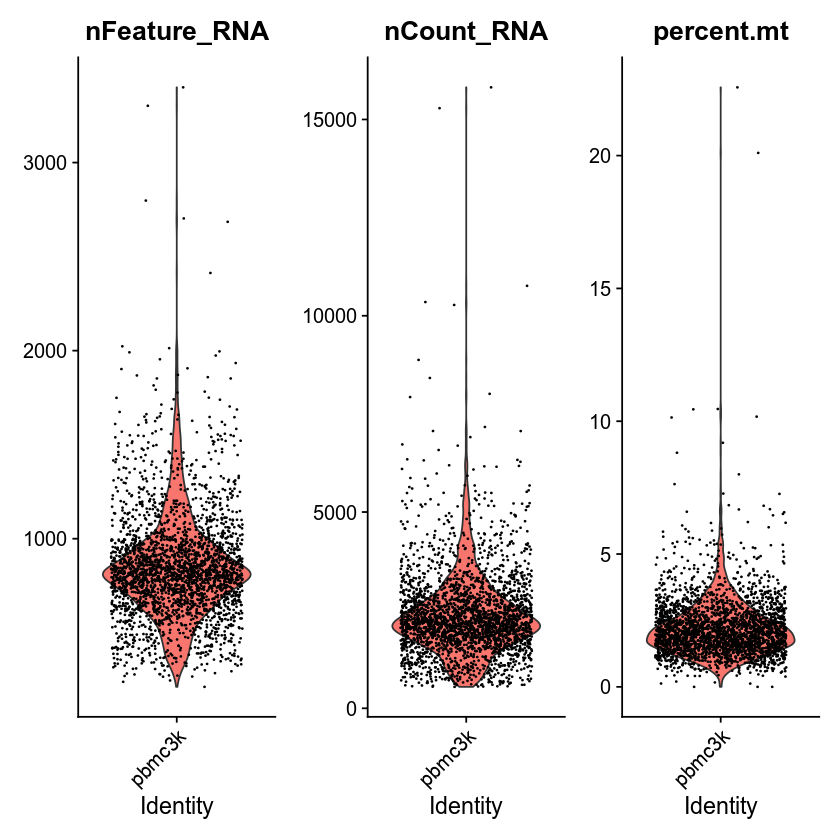

In [7]:
VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)


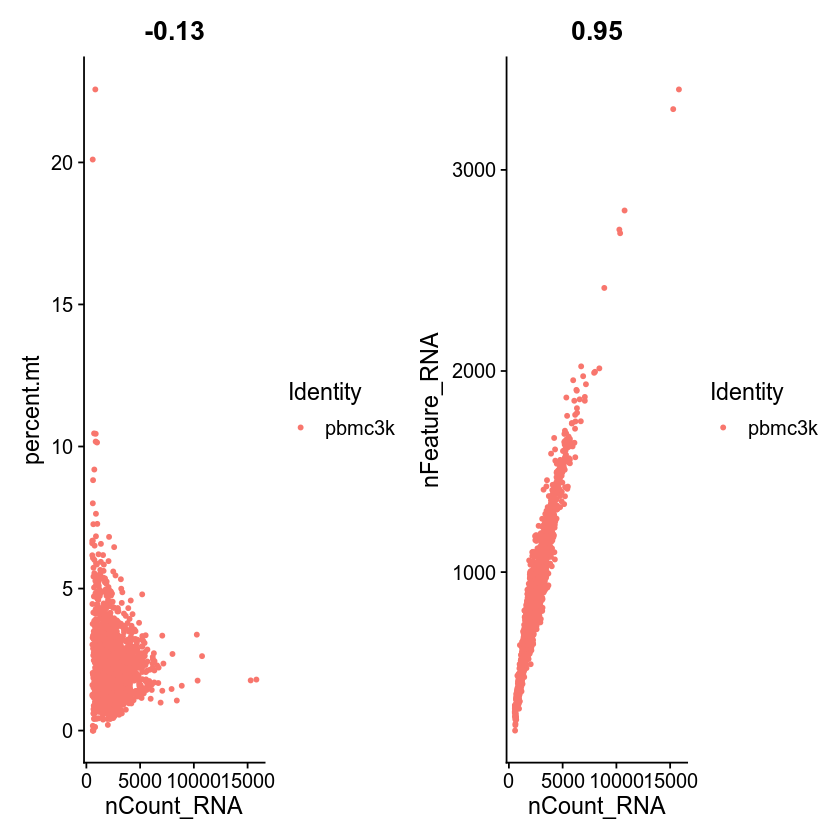

In [8]:
plot1 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2


In [9]:
pbmc <- subset(pbmc, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)


In [10]:
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc <- NormalizeData(pbmc)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


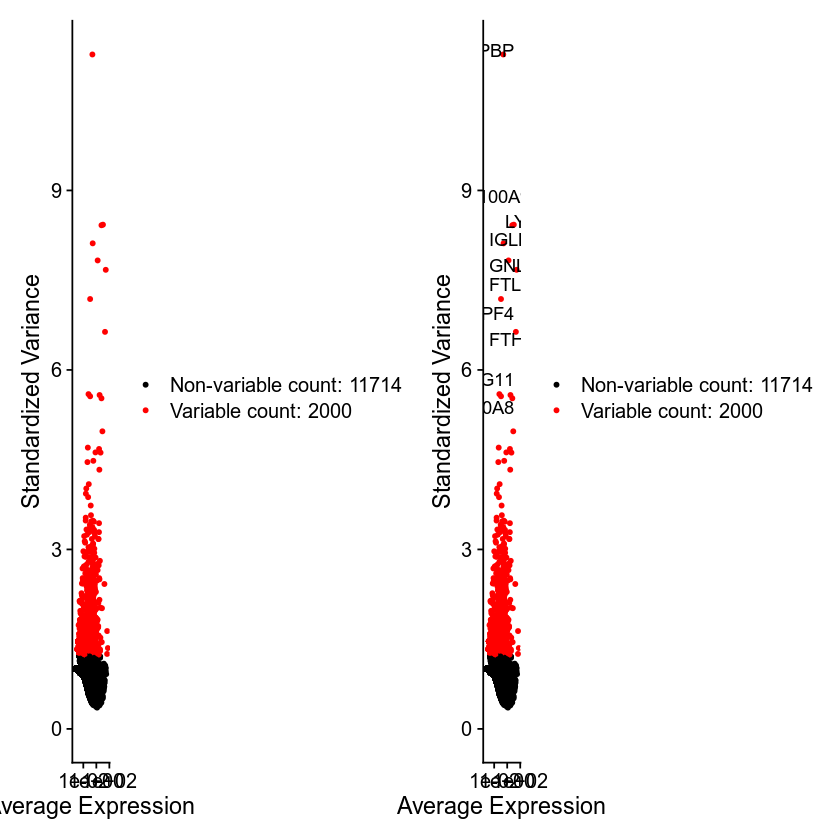

In [11]:
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)
# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(pbmc), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(pbmc)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1 + plot2

In [12]:
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)

Centering and scaling data matrix



In [13]:
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL, FTH1, LYZ, FCN1, S100A9, TYMP 
	   FCER1G, CFD, LGALS1, S100A8, CTSS, LGALS2, SERPINA1, IFITM3, SPI1, CFP 
	   PSAP, IFI30, SAT1, COTL1, S100A11, NPC2, GRN, LGALS3, GSTP1, PYCARD 
Negative:  MALAT1, LTB, IL32, IL7R, CD2, B2M, ACAP1, CD27, STK17A, CTSW 
	   CD247, GIMAP5, AQP3, CCL5, SELL, TRAF3IP3, GZMA, MAL, CST7, ITM2A 
	   MYC, GIMAP7, HOPX, BEX2, LDLRAP1, GZMK, ETS1, ZAP70, TNFAIP8, RIC3 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1, HLA-DRA, LINC00926, CD79B, HLA-DRB1, CD74 
	   HLA-DMA, HLA-DPB1, HLA-DQA2, CD37, HLA-DRB5, HLA-DMB, HLA-DPA1, FCRLA, HVCN1, LTB 
	   BLNK, P2RX5, IGLL5, IRF8, SWAP70, ARHGAP24, FCGR2B, SMIM14, PPP1R14A, C16orf74 
Negative:  NKG7, PRF1, CST7, GZMB, GZMA, FGFBP2, CTSW, GNLY, B2M, SPON2 
	   CCL4, GZMH, FCGR3A, CCL5, CD247, XCL2, CLIC3, AKR1C3, SRGN, HOPX 
	   TTC38, APMAP, CTSC, S100A4, IGFBP7, ANXA1, ID2, IL32, XCL1, RHOC 
PC_ 3 
Positive:  HLA-DQA1, CD79A, CD79B, HLA-DQB1, HLA-DPB1, HLA-DPA

In [19]:
pbmc <- RunTSNE(pbmc, dims=1:10)


In [93]:
pbmc.expression <- data.matrix(pbmc.data)
pbmc.pca <- data.frame(pbmc[['pca']]@cell.embeddings)
pbmc.tsne <- data.frame(pbmc[['tsne']]@cell.embeddings)

In [94]:
pbmc.pca_20 <- pbmc.pca[,c(1:20)]


In [31]:
dim(dat.expression)


[1] 32738  2700

[1] 32738  2700

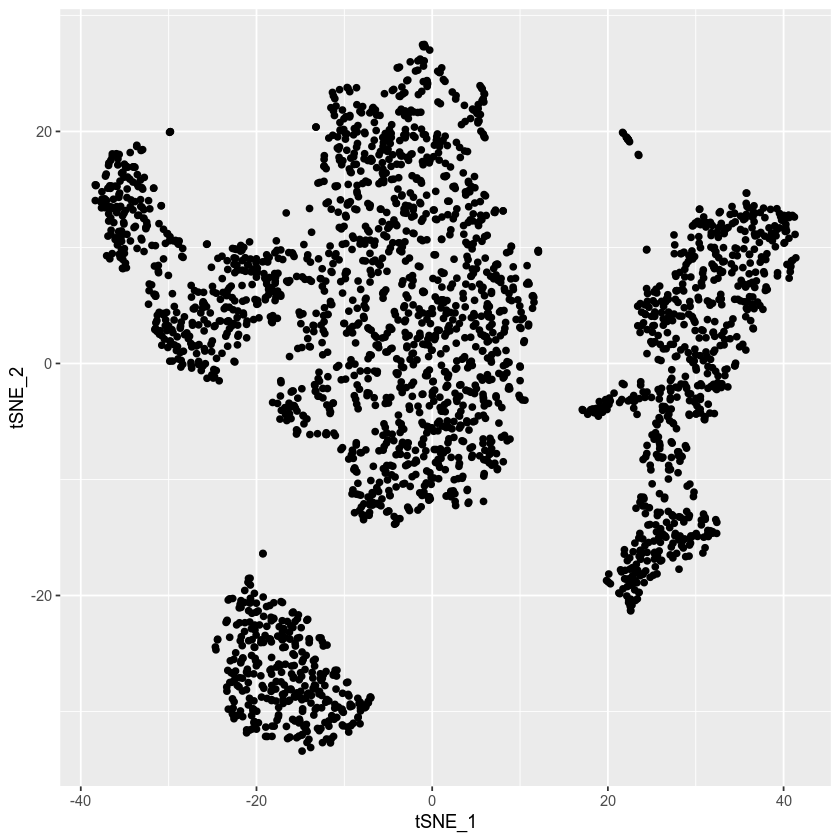

In [29]:

#> [1] 10537  1429
# visualizing the cells in a t-SNE plot:
ggplot(data.frame(dat.tsne), aes(x = tSNE_1, y = tSNE_2)) + geom_point()


In [47]:
str(dat.expression)


 num [1:10537, 1:1429] 2.08 0 1.51 0 1.51 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:10537] "Mrpl15" "Lypla1" "Tcea1" "Atp6v1h" ...
  ..$ : chr [1:1429] "X10X_P7_11_AAACCTGAGACAGGCT" "X10X_P7_11_AAACCTGAGAGTCTGG" "X10X_P7_11_AAACCTGCAGGAATGC" "X10X_P7_11_AAACCTGGTACCGTAT" ...


In [50]:
dm = data.matrix(pbmc.expression)


In [51]:
str(dm)


 num [1:32738, 1:2700] 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:32738] "MIR1302-10" "FAM138A" "OR4F5" "RP11-34P13.7" ...
  ..$ : chr [1:2700] "AAACATACAACCAC-1" "AAACATTGAGCTAC-1" "AAACATTGATCAGC-1" "AAACCGTGCTTCCG-1" ...


In [32]:
dim(dat.pca)

[1] 2638   50

In [ ]:
dim(dat.pca_20)

In [37]:
df_expression = data.frame(dat.expression)


In [58]:
dat.pca


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10X_P7_11_AAACCTGAGACAGGCT,-10.00489449,-3.0669046,-3.6929923,-0.49941188,2.8246160,-0.6501587,-2.75783228,-2.8232536,5.15989690,-3.09246761,-6.5905595,1.4700705,-1.04323639,1.71776781,-2.34994655,-1.00081423,-2.46579003,1.00775376,-4.08215406,0.6633342
10X_P7_11_AAACCTGAGAGTCTGG,6.25260510,-11.4534920,7.1607430,-2.46667582,-1.6850777,-4.2330643,2.88025807,-1.0189728,3.71733082,-0.34111113,2.6524831,0.7159471,-3.23765212,-2.75971647,2.40588382,-0.93042951,-0.00075652,1.95691420,1.10773029,1.0216378
10X_P7_11_AAACCTGCAGGAATGC,-4.39020880,1.6523773,-1.2125789,-11.09462013,-2.2648496,3.3171336,1.79236666,-2.2821550,-1.28394470,3.96562986,3.1021116,0.9210480,-2.40597594,-2.90208295,-0.84652342,3.33597730,-1.41220404,-2.04420455,-2.33208359,-3.9287131
10X_P7_11_AAACCTGGTACCGTAT,-0.32051190,11.6685076,2.3386699,0.08550624,0.9846963,1.2270037,-0.17170360,3.3363798,0.04212876,-3.74025132,-1.2523259,-5.9530689,1.40207997,2.33683603,6.18262125,3.23801400,3.20179007,-0.82998623,1.67677050,-2.4313379
10X_P7_11_AAACGGGGTCAAACTC,-13.06385521,-4.0582796,3.3034068,11.67320438,-9.7204600,9.0691304,-12.37862346,-1.2543690,1.59168104,8.77551872,2.6424548,2.7522082,-4.86716723,-3.03050760,-6.29894473,-3.79575011,7.34296995,7.79743756,3.42657293,0.8830740
10X_P7_11_AAACGGGGTCGGCTCA,-13.31997959,-4.4259117,-3.1192751,0.06315524,4.7270570,-2.7169790,-2.05803097,-3.1366618,0.57376754,5.23516343,-2.0679676,-0.3450364,2.10427282,-0.88197848,3.19474328,0.61967967,-3.25305201,1.14582152,-2.07575372,3.3318723
10X_P7_11_AAACGGGTCCCGGATG,-10.58074918,-1.8696088,0.5699929,1.72916399,0.1362864,-2.4611442,1.42453809,2.4772832,2.10008046,-0.45134395,6.9423719,0.6725495,3.89099378,0.70523425,-5.38705475,1.80908871,1.75447455,1.36235523,-0.02981881,-6.4431094
10X_P7_11_AAAGATGAGACCCACC,-3.92616934,8.6714361,-1.1370450,-3.76757316,-0.3381414,1.1407410,0.56390817,-0.9355159,-0.10116771,0.11617858,4.2994725,-1.6392162,-2.67656154,1.13065410,-1.41715840,-0.52702037,-3.46423231,-0.55442479,-0.48336064,0.7409823
10X_P7_11_AAAGATGAGTAGATGT,-2.17816271,-0.8800981,13.7887461,4.54879653,-5.8117309,-10.9886096,4.70827419,10.1677356,6.47977923,6.98238756,-8.4115808,7.8981982,5.08994947,0.08691909,2.50461277,3.36738693,-0.15755230,1.01306511,0.21795799,1.1658042


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10X_P7_11_AAACCTGAGACAGGCT,-10.00489449,-3.0669046,-3.6929923,-0.49941188,2.8246160,-0.6501587,-2.75783228,-2.8232536,5.15989690,-3.09246761,-6.5905595,1.4700705,-1.04323639,1.71776781,-2.34994655,-1.00081423,-2.46579003,1.00775376,-4.08215406,0.6633342
10X_P7_11_AAACCTGAGAGTCTGG,6.25260510,-11.4534920,7.1607430,-2.46667582,-1.6850777,-4.2330643,2.88025807,-1.0189728,3.71733082,-0.34111113,2.6524831,0.7159471,-3.23765212,-2.75971647,2.40588382,-0.93042951,-0.00075652,1.95691420,1.10773029,1.0216378
10X_P7_11_AAACCTGCAGGAATGC,-4.39020880,1.6523773,-1.2125789,-11.09462013,-2.2648496,3.3171336,1.79236666,-2.2821550,-1.28394470,3.96562986,3.1021116,0.9210480,-2.40597594,-2.90208295,-0.84652342,3.33597730,-1.41220404,-2.04420455,-2.33208359,-3.9287131
10X_P7_11_AAACCTGGTACCGTAT,-0.32051190,11.6685076,2.3386699,0.08550624,0.9846963,1.2270037,-0.17170360,3.3363798,0.04212876,-3.74025132,-1.2523259,-5.9530689,1.40207997,2.33683603,6.18262125,3.23801400,3.20179007,-0.82998623,1.67677050,-2.4313379
10X_P7_11_AAACGGGGTCAAACTC,-13.06385521,-4.0582796,3.3034068,11.67320438,-9.7204600,9.0691304,-12.37862346,-1.2543690,1.59168104,8.77551872,2.6424548,2.7522082,-4.86716723,-3.03050760,-6.29894473,-3.79575011,7.34296995,7.79743756,3.42657293,0.8830740
10X_P7_11_AAACGGGGTCGGCTCA,-13.31997959,-4.4259117,-3.1192751,0.06315524,4.7270570,-2.7169790,-2.05803097,-3.1366618,0.57376754,5.23516343,-2.0679676,-0.3450364,2.10427282,-0.88197848,3.19474328,0.61967967,-3.25305201,1.14582152,-2.07575372,3.3318723
10X_P7_11_AAACGGGTCCCGGATG,-10.58074918,-1.8696088,0.5699929,1.72916399,0.1362864,-2.4611442,1.42453809,2.4772832,2.10008046,-0.45134395,6.9423719,0.6725495,3.89099378,0.70523425,-5.38705475,1.80908871,1.75447455,1.36235523,-0.02981881,-6.4431094
10X_P7_11_AAAGATGAGACCCACC,-3.92616934,8.6714361,-1.1370450,-3.76757316,-0.3381414,1.1407410,0.56390817,-0.9355159,-0.10116771,0.11617858,4.2994725,-1.6392162,-2.67656154,1.13065410,-1.41715840,-0.52702037,-3.46423231,-0.55442479,-0.48336064,0.7409823
10X_P7_11_AAAGATGAGTAGATGT,-2.17816271,-0.8800981,13.7887461,4.54879653,-5.8117309,-10.9886096,4.70827419,10.1677356,6.47977923,6.98238756,-8.4115808,7.8981982,5.08994947,0.08691909,2.50461277,3.36738693,-0.15755230,1.01306511,0.21795799,1.1658042


In [62]:
pbmc.pca

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,⋯,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACATACAACCAC-1,-4.7298963,-0.5182652,-0.78090997,-2.3089783,-0.07158848,0.13023511,1.6305902,-1.183533334,-1.25312179,-1.901717241,⋯,2.02782244,-0.3993873,1.5301073,0.05669722,-1.6056211,1.23770815,1.54453088,-0.06487761,-1.36473213,1.85044680
AAACATTGAGCTAC-1,-0.5176254,4.5923068,5.96056923,6.8677364,-1.96144350,2.78468375,1.5152072,-0.356505729,0.82621215,-0.584194573,⋯,1.31325786,0.1912740,-1.7883161,-2.24749897,-0.3352678,0.40849746,0.26764835,1.34740017,0.61107748,0.93816111
AAACATTGATCAGC-1,-3.1892555,-3.4694432,-0.84697819,-1.9956538,-5.10640863,2.12371160,0.3366152,3.730706080,0.90385318,-1.131431935,⋯,0.76722987,0.6881223,-0.1645176,-1.15925443,0.6397097,2.77254336,0.90877581,2.21863747,1.46446976,1.69671608
AAACCGTGCTTCCG-1,12.7931387,0.1008253,0.62926618,-0.3737225,0.21943186,-2.84110008,0.8129484,0.134616146,0.61853805,3.440655000,⋯,2.04858698,1.2859544,-1.7926969,0.55108914,-1.3044307,-2.24268117,0.43822632,-1.07258319,-0.21780694,1.39725029
AAACCGTGTATGCG-1,-3.1290640,-6.3478829,1.26560015,3.0147877,7.84529636,-1.29897667,-2.4097103,-0.418848347,2.88261096,1.189798992,⋯,-1.06822796,-1.5781181,0.5295320,-0.09055095,0.5060710,-1.33332881,-0.87161003,2.44705859,-0.78099628,1.42396295
AAACGCACTGGTAC-1,-3.1090537,0.9263107,-0.66516745,-2.3198198,-2.00491810,1.48417895,0.2697326,-0.423223994,0.20709177,1.541081283,⋯,-1.90808825,-1.3414018,-1.4944880,-0.30049835,1.6629658,2.30026518,2.13683070,-1.52897092,-4.23066412,-2.50465152
AAACGCTGACCAGT-1,-5.0240458,-2.1163888,-0.19651307,-2.1072840,1.11581208,0.65656006,2.8352467,-1.004704830,-1.59474155,-0.488362022,⋯,0.19861986,1.5839299,-0.2702316,-0.05363470,0.2625016,-0.87753158,0.95051666,-2.02825526,-0.81553216,-3.04776773
AAACGCTGGTTCTT-1,-4.9134545,-2.9156280,-0.04381404,-0.8202407,-0.97434022,-0.60189869,3.0053320,0.759334684,0.84761881,0.078789282,⋯,0.57047267,-3.1428220,-1.5539955,3.81659031,-1.5440717,-1.23156661,0.82443731,-1.78160673,1.77361362,4.63086279
AAACGCTGTAGCCA-1,-5.2666534,0.8731879,0.39419513,0.4214284,4.23482294,-2.48388000,4.0526623,-0.649853372,0.46488061,0.311989861,⋯,1.27825721,0.1036815,2.0038828,-0.53110955,2.5100462,0.91481504,-0.96573189,1.22221762,-0.01563678,0.06064821


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,⋯,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACATACAACCAC-1,-4.7298963,-0.5182652,-0.78090997,-2.3089783,-0.07158848,0.13023511,1.6305902,-1.183533334,-1.25312179,-1.901717241,⋯,2.02782244,-0.3993873,1.5301073,0.05669722,-1.6056211,1.23770815,1.54453088,-0.06487761,-1.36473213,1.85044680
AAACATTGAGCTAC-1,-0.5176254,4.5923068,5.96056923,6.8677364,-1.96144350,2.78468375,1.5152072,-0.356505729,0.82621215,-0.584194573,⋯,1.31325786,0.1912740,-1.7883161,-2.24749897,-0.3352678,0.40849746,0.26764835,1.34740017,0.61107748,0.93816111
AAACATTGATCAGC-1,-3.1892555,-3.4694432,-0.84697819,-1.9956538,-5.10640863,2.12371160,0.3366152,3.730706080,0.90385318,-1.131431935,⋯,0.76722987,0.6881223,-0.1645176,-1.15925443,0.6397097,2.77254336,0.90877581,2.21863747,1.46446976,1.69671608
AAACCGTGCTTCCG-1,12.7931387,0.1008253,0.62926618,-0.3737225,0.21943186,-2.84110008,0.8129484,0.134616146,0.61853805,3.440655000,⋯,2.04858698,1.2859544,-1.7926969,0.55108914,-1.3044307,-2.24268117,0.43822632,-1.07258319,-0.21780694,1.39725029
AAACCGTGTATGCG-1,-3.1290640,-6.3478829,1.26560015,3.0147877,7.84529636,-1.29897667,-2.4097103,-0.418848347,2.88261096,1.189798992,⋯,-1.06822796,-1.5781181,0.5295320,-0.09055095,0.5060710,-1.33332881,-0.87161003,2.44705859,-0.78099628,1.42396295
AAACGCACTGGTAC-1,-3.1090537,0.9263107,-0.66516745,-2.3198198,-2.00491810,1.48417895,0.2697326,-0.423223994,0.20709177,1.541081283,⋯,-1.90808825,-1.3414018,-1.4944880,-0.30049835,1.6629658,2.30026518,2.13683070,-1.52897092,-4.23066412,-2.50465152
AAACGCTGACCAGT-1,-5.0240458,-2.1163888,-0.19651307,-2.1072840,1.11581208,0.65656006,2.8352467,-1.004704830,-1.59474155,-0.488362022,⋯,0.19861986,1.5839299,-0.2702316,-0.05363470,0.2625016,-0.87753158,0.95051666,-2.02825526,-0.81553216,-3.04776773
AAACGCTGGTTCTT-1,-4.9134545,-2.9156280,-0.04381404,-0.8202407,-0.97434022,-0.60189869,3.0053320,0.759334684,0.84761881,0.078789282,⋯,0.57047267,-3.1428220,-1.5539955,3.81659031,-1.5440717,-1.23156661,0.82443731,-1.78160673,1.77361362,4.63086279
AAACGCTGTAGCCA-1,-5.2666534,0.8731879,0.39419513,0.4214284,4.23482294,-2.48388000,4.0526623,-0.649853372,0.46488061,0.311989861,⋯,1.27825721,0.1036815,2.0038828,-0.53110955,2.5100462,0.91481504,-0.96573189,1.22221762,-0.01563678,0.06064821


In [85]:
pbmc.data = as.matrix(pbmc[['RNA']]@data)
pbmc.sparse = pbmc[['RNA']]@data


In [63]:
str(pbmc.expression)


 num [1:32738, 1:2700] 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:32738] "MIR1302-10" "FAM138A" "OR4F5" "RP11-34P13.7" ...
  ..$ : chr [1:2700] "AAACATACAACCAC-1" "AAACATTGAGCTAC-1" "AAACATTGATCAGC-1" "AAACCGTGCTTCCG-1" ...
 num [1:32738, 1:2700] 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:32738] "MIR1302-10" "FAM138A" "OR4F5" "RP11-34P13.7" ...
  ..$ : chr [1:2700] "AAACATACAACCAC-1" "AAACATTGAGCTAC-1" "AAACATTGATCAGC-1" "AAACCGTGCTTCCG-1" ...


In [59]:
dat.expression

,X10X_P7_11_AAACCTGAGACAGGCT,X10X_P7_11_AAACCTGAGAGTCTGG,X10X_P7_11_AAACCTGCAGGAATGC,X10X_P7_11_AAACCTGGTACCGTAT,X10X_P7_11_AAACGGGGTCAAACTC,X10X_P7_11_AAACGGGGTCGGCTCA,X10X_P7_11_AAACGGGTCCCGGATG,X10X_P7_11_AAAGATGAGACCCACC,X10X_P7_11_AAAGATGAGTAGATGT,X10X_P7_11_AAAGATGCAACAACCT,⋯,X10X_P7_11_TTTCCTCGTAATTGGA,X10X_P7_11_TTTCCTCTCAATCACG,X10X_P7_11_TTTGCGCAGAGTAATC,X10X_P7_11_TTTGCGCCACCCATTC,X10X_P7_11_TTTGCGCCATACAGCT,X10X_P7_11_TTTGCGCGTTAAAGAC,X10X_P7_11_TTTGGTTCACCAGCAC,X10X_P7_11_TTTGGTTTCCGAACGC,X10X_P7_11_TTTGGTTTCCTAGGGC,X10X_P7_11_TTTGTCATCGAACTGT
Mrpl15,2.081939,0.5902685,0.000000,1.521502,0.000000,0.000000,0.000000,1.413761,1.005877,0.000000,⋯,1.267052,0.000000,0.8839831,0.000000,0.7432213,0.000000,1.1947769,0.000000,0.000000,1.165038
Lypla1,0.000000,0.3380684,0.000000,1.521502,0.000000,0.000000,0.000000,0.000000,1.005877,0.000000,⋯,0.000000,0.000000,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.000000
Tcea1,1.506298,0.3380684,0.000000,0.000000,1.179348,0.000000,0.000000,1.413761,1.005877,0.000000,⋯,0.000000,0.000000,0.6662972,0.000000,0.9043250,0.000000,0.0000000,0.000000,0.000000,0.000000
Atp6v1h,0.000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.0000000,1.566687,0.0000000,0.000000,0.7661237,0.000000,0.000000,0.000000
Rb1cc1,1.506298,0.0000000,1.429986,2.099023,0.000000,0.000000,1.036679,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.3876455,1.566687,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.000000
Pcmtd1,0.000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.005877,0.000000,⋯,0.000000,0.000000,0.3876455,0.000000,0.0000000,1.771022,0.0000000,0.000000,0.000000,0.000000
Rrs1,0.000000,0.5902685,0.000000,0.000000,0.000000,1.371918,0.000000,0.000000,1.005877,0.000000,⋯,0.000000,0.000000,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.000000
Vcpip1,0.000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,1.267052,0.000000,0.3876455,0.000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.000000
Sgk3,0.000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.005877,0.000000,⋯,0.000000,0.000000,0.3876455,1.566687,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.000000
Snhg6,0.000000,1.2277143,0.000000,1.521502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,1.267052,0.000000,1.2141814,0.000000,0.5510835,1.235015,0.0000000,0.000000,0.000000,0.000000


,X10X_P7_11_AAACCTGAGACAGGCT,X10X_P7_11_AAACCTGAGAGTCTGG,X10X_P7_11_AAACCTGCAGGAATGC,X10X_P7_11_AAACCTGGTACCGTAT,X10X_P7_11_AAACGGGGTCAAACTC,X10X_P7_11_AAACGGGGTCGGCTCA,X10X_P7_11_AAACGGGTCCCGGATG,X10X_P7_11_AAAGATGAGACCCACC,X10X_P7_11_AAAGATGAGTAGATGT,X10X_P7_11_AAAGATGCAACAACCT,⋯,X10X_P7_11_TTTCCTCGTAATTGGA,X10X_P7_11_TTTCCTCTCAATCACG,X10X_P7_11_TTTGCGCAGAGTAATC,X10X_P7_11_TTTGCGCCACCCATTC,X10X_P7_11_TTTGCGCCATACAGCT,X10X_P7_11_TTTGCGCGTTAAAGAC,X10X_P7_11_TTTGGTTCACCAGCAC,X10X_P7_11_TTTGGTTTCCGAACGC,X10X_P7_11_TTTGGTTTCCTAGGGC,X10X_P7_11_TTTGTCATCGAACTGT
Mrpl15,2.081939,0.5902685,0.000000,1.521502,0.000000,0.000000,0.000000,1.413761,1.005877,0.000000,⋯,1.267052,0.000000,0.8839831,0.000000,0.7432213,0.000000,1.1947769,0.000000,0.000000,1.165038
Lypla1,0.000000,0.3380684,0.000000,1.521502,0.000000,0.000000,0.000000,0.000000,1.005877,0.000000,⋯,0.000000,0.000000,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.000000
Tcea1,1.506298,0.3380684,0.000000,0.000000,1.179348,0.000000,0.000000,1.413761,1.005877,0.000000,⋯,0.000000,0.000000,0.6662972,0.000000,0.9043250,0.000000,0.0000000,0.000000,0.000000,0.000000
Atp6v1h,0.000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.0000000,1.566687,0.0000000,0.000000,0.7661237,0.000000,0.000000,0.000000
Rb1cc1,1.506298,0.0000000,1.429986,2.099023,0.000000,0.000000,1.036679,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.3876455,1.566687,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.000000
Pcmtd1,0.000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.005877,0.000000,⋯,0.000000,0.000000,0.3876455,0.000000,0.0000000,1.771022,0.0000000,0.000000,0.000000,0.000000
Rrs1,0.000000,0.5902685,0.000000,0.000000,0.000000,1.371918,0.000000,0.000000,1.005877,0.000000,⋯,0.000000,0.000000,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.000000
Vcpip1,0.000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,1.267052,0.000000,0.3876455,0.000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.000000
Sgk3,0.000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.005877,0.000000,⋯,0.000000,0.000000,0.3876455,1.566687,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.000000
Snhg6,0.000000,1.2277143,0.000000,1.521502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,1.267052,0.000000,1.2141814,0.000000,0.5510835,1.235015,0.0000000,0.000000,0.000000,0.000000


In [84]:
str(pbmc.data)

 num [1:13714, 1:2638] 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:13714] "AL627309.1" "AP006222.2" "RP11-206L10.2" "RP11-206L10.9" ...
  ..$ : chr [1:2638] "AAACATACAACCAC-1" "AAACATTGAGCTAC-1" "AAACATTGATCAGC-1" "AAACCGTGCTTCCG-1" ...


In [92]:
pbmc.pca

ERROR: Error in eval(expr, envir, enclos): object 'pbmc.pca_20' not found


In [83]:
str(dat.expression)

 num [1:10537, 1:1429] 2.08 0 1.51 0 1.51 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:10537] "Mrpl15" "Lypla1" "Tcea1" "Atp6v1h" ...
  ..$ : chr [1:1429] "X10X_P7_11_AAACCTGAGACAGGCT" "X10X_P7_11_AAACCTGAGAGTCTGG" "X10X_P7_11_AAACCTGCAGGAATGC" "X10X_P7_11_AAACCTGGTACCGTAT" ...


In [95]:
pbmc.pca_20


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACATACAACCAC-1,-4.7298963,-0.5182652,-0.78090997,-2.3089783,-0.07158848,0.13023511,1.6305902,-1.183533334,-1.25312179,-1.901717241,0.7469317,3.62278586,1.0923521,0.8299280,0.41423134,0.1667659,1.3901968,1.26684816,-0.40592018,-3.26200402
AAACATTGAGCTAC-1,-0.5176254,4.5923068,5.96056923,6.8677364,-1.96144350,2.78468375,1.5152072,-0.356505729,0.82621215,-0.584194573,-0.5833986,0.84284010,-2.1607398,-2.8959563,-0.01277594,3.0467129,-1.3015509,2.52447257,-0.87536355,-1.28593447
AAACATTGATCAGC-1,-3.1892555,-3.4694432,-0.84697819,-1.9956538,-5.10640863,2.12371160,0.3366152,3.730706080,0.90385318,-1.131431935,-2.0349191,2.42898626,0.5893520,-0.2687666,1.03153190,0.7757100,-1.2387931,-0.53212775,-1.93873766,0.38430873
AAACCGTGCTTCCG-1,12.7931387,0.1008253,0.62926618,-0.3737225,0.21943186,-2.84110008,0.8129484,0.134616146,0.61853805,3.440655000,-1.9380377,0.58499449,0.7689500,2.0778841,0.10377355,1.3086938,0.3567795,2.57299235,0.28714796,0.03140099
AAACCGTGTATGCG-1,-3.1290640,-6.3478829,1.26560015,3.0147877,7.84529636,-1.29897667,-2.4097103,-0.418848347,2.88261096,1.189798992,-3.6331320,-0.47571084,-0.8131060,0.9935867,0.78032945,-2.0470772,-2.4443057,-2.63702207,-0.15052497,-0.11453115
AAACGCACTGGTAC-1,-3.1090537,0.9263107,-0.66516745,-2.3198198,-2.00491810,1.48417895,0.2697326,-0.423223994,0.20709177,1.541081283,-1.3820617,-1.32581574,-0.7831396,-1.0865275,0.69441950,-1.5020371,-2.9702952,-1.60883331,2.11944510,-0.74465142
AAACGCTGACCAGT-1,-5.0240458,-2.1163888,-0.19651307,-2.1072840,1.11581208,0.65656006,2.8352467,-1.004704830,-1.59474155,-0.488362022,1.5061033,-1.91050670,0.5629590,0.0583979,-1.19127449,-0.9708570,-1.0972161,-0.14800374,-1.84109060,2.73801962
AAACGCTGGTTCTT-1,-4.9134545,-2.9156280,-0.04381404,-0.8202407,-0.97434022,-0.60189869,3.0053320,0.759334684,0.84761881,0.078789282,1.9905693,2.07027411,0.3924733,0.9371649,-0.35027994,2.8174276,-1.1578278,-0.59638545,-2.48929649,0.95528851
AAACGCTGTAGCCA-1,-5.2666534,0.8731879,0.39419513,0.4214284,4.23482294,-2.48388000,4.0526623,-0.649853372,0.46488061,0.311989861,2.2706039,0.92922418,0.1767235,2.2134120,0.93169933,0.3687537,2.6900738,0.62815572,0.41880987,-1.00723778


In [102]:
singleCellHaystack:::haystack.matrix(as.matrix(pbmc.pca_20), pbmc.data)

### calling haystack_highD()...



ERROR: Error in haystack_highD(x, detection = detection, use.advanced.sampling = use.advanced.sampling, : argument "detection" is missing, with no default


In [105]:
start_time <- Sys.time()
set.seed(123)
res.pc20 <- haystack(x = pbmc.pca_20, detection = pbmc.data > 1)
end_time <- Sys.time()
end_time - start_time

### calling haystack_highD()...

### scaling input data...

### deciding grid points...

### calculating Kullback-Leibler divergences...

### performing randomizations...

### estimating p-values...

### returning result...



Time difference of 1.385762 mins

In [106]:
res.pc20

$results
                            D_KL    log.p.vals     log.p.adj T.counts
AL627309.1          3.650008e-02 -9.847357e-01   0.000000000        9
AP006222.2          2.223429e-02 -1.525938e-01   0.000000000        3
RP11-206L10.2       4.063208e-02 -4.987001e-01   0.000000000        3
RP11-206L10.9       1.013120e-01 -1.650546e+00   0.000000000        3
LINC00115           8.390395e-03 -2.152776e-01   0.000000000       18
NOC2L               1.147050e-03 -2.173048e+00   0.000000000      249
KLHL17              8.837819e-03 -2.434369e-02   0.000000000        7
PLEKHN1             2.239824e-02 -3.220413e-01   0.000000000        7
RP11-54O7.17        9.896915e-02 -1.610306e+00   0.000000000        3
HES4                7.969707e-02 -4.006112e+01 -35.923956132      143
RP11-54O7.11        1.175222e-01 -2.138882e+00   0.000000000        4
ISG15               5.548937e-03 -3.583526e+01 -31.698092443     1174
AGRN                4.257665e-02 -9.442321e-01   0.000000000        7
C1orf159   

In [86]:
start_time <- Sys.time()
set.seed(123)
res.pc20 <- haystack(x = dat.pca_20, expression = pbmc.sparse)

end_time <- Sys.time()
end_time - start_time

ERROR: Error in haystack_highD(x, detection = detection, use.advanced.sampling = use.advanced.sampling, : unused argument (expression = new("dgCMatrix", i = c(29, 73, 80, 148, 163, 184, 186, 227, 229, 230, 231, 247, 266, 268, 328, 335, 360, 386, 398, 413, 436, 445, 466, 481, 489, 498, 506, 523, 536, 551, 625, 636, 652, 672, 733, 777, 815, 827, 852, 864, 869, 887, 893, 897, 904, 912, 916, 924, 927, 929, 938, 973, 985, 1009, 1018, 1031, 1044, 1086, 1187, 1217, 1222, 1237, 1247, 1261, 1270, 1314, 1321, 1367, 1379, 1414, 1416, 1448, 1455, 1461, 1514, 1515, 1567, 1593, 1620, 1642, 1660, 1661, 1683, 1705, 1707, 1718, 
1725, 1728, 1788, 1789, 1797, 1798, 1815, 1816, 1819, 1835, 1836, 1856, 1879, 1900, 1918, 1933, 1989, 1993, 2012, 2042, 2092, 2094, 2105, 2138, 2145, 2160, 2176, 2187, 2210, 2213, 2216, 2220, 2232, 2242, 2244, 2248, 2287, 2303, 2316, 2333, 2336, 2342, 2355, 2363, 2364, 2375, 2384, 2390, 2402, 2432, 2447, 2481, 2484, 2498, 2551, 2570, 2580, 2591, 2627, 2646, 2647, 2675, 2686, 2696, 2730, 2741, 2826, 2859, 2861, 2908, 2931, 2933, 2973, 3028, 3029, 3040, 3047, 3096, 3097, 3105, 3151, 3160, 3194, 3198, 
3241, 3248, 3260, 3274, 3279, 3285, 3287, 3289, 3348, 3359, 3369, 3373, 3406, 3408, 3427, 3444, 3460, 3504, 3508, 3554, 3589, 3593, 3648, 3658, 3661, 3664, 3685, 3689, 3719, 3730, 3756, 3804, 3806, 3809, 3836, 3866, 3896, 3904, 3906, 3909, 3950, 3957, 3987, 3993, 4025, 4026, 4033, 4034, 4040, 4048, 4054, 4084, 4088, 4105, 4113, 4116, 4118, 4153, 4165, 4169, 4176, 4205, 4209, 4215, 4227, 4325, 4334, 4358, 4359, 4364, 4367, 4390, 4404, 4407, 4409, 4418, 4421, 4436, 4443, 4453, 4457, 4461, 4467, 4469, 
4487, 4548, 4550, 4553, 4581, 4611, 4613, 4617, 4648, 4680, 4683, 4687, 4726, 4743, 4745, 4748, 4749, 4766, 4778, 4780, 4787, 4789, 4802, 4813, 4830, 4846, 4856, 4883, 4911, 4926, 4939, 4941, 4952, 4963, 4974, 4989, 5028, 5030, 5047, 5066, 5087, 5092, 5097, 5134, 5170, 5179, 5216, 5217, 5221, 5230, 5258, 5271, 5336, 5346, 5374, 5381, 5414, 5458, 5461, 5515, 5523, 5540, 5554, 5556, 5571, 5573, 5577, 5580, 5636, 5638, 5654, 5712, 5724, 5740, 5748, 5761, 5796, 5825, 5826, 5829, 5844, 5847, 5902, 5905, 
5915, 5932, 5971, 5984, 5989, 6003, 6010, 6038, 6048, 6050, 6066, 6120, 6125, 6156, 6170, 6186, 6192, 6236, 6238, 6247, 6252, 6253, 6257, 6280, 6300, 6313, 6368, 6378, 6383, 6413, 6457, 6461, 6503, 6516, 6530, 6561, 6689, 6723, 6742, 6756, 6771, 6800, 6866, 6884, 6913, 6914, 6943, 6952, 6972, 6974, 7011, 7022, 7042, 7075, 7080, 7128, 7149, 7163, 7172, 7184, 7202, 7248, 7305, 7311, 7380, 7407, 7411, 7416, 7472, 7499, 7509, 7531, 7536, 7552, 7561, 7565, 7570, 7585, 7587, 7602, 7610, 7646, 7649, 7669, 
7701, 7712, 7748, 7749, 7754, 7759, 7766, 7770, 7787, 7841, 7852, 7854, 7860, 7870, 7873, 7875, 7878, 7925, 7932, 7939, 7953, 7990, 8001, 8004, 8034, 8063, 8076, 8081, 8111, 8124, 8143, 8144, 8145, 8148, 8160, 8222, 8266, 8279, 8284, 8306, 8308, 8339, 8349, 8384, 8396, 8445, 8447, 8463, 8493, 8519, 8521, 8547, 8552, 8564, 8568, 8585, 8590, 8591, 8597, 8606, 8617, 8645, 8681, 8691, 8704, 8724, 8730, 8771, 8800, 8815, 8840, 8844, 8870, 8873, 8878, 8886, 8953, 8962, 8988, 8996, 9012, 9016, 9018, 9032, 
9075, 9082, 9085, 9092, 9095, 9133, 9151, 9198, 9222, 9230, 9232, 9268, 9282, 9318, 9337, 9339, 9341, 9372, 9374, 9385, 9388, 9398, 9408, 9411, 9419, 9454, 9486, 9488, 9500, 9501, 9504, 9520, 9545, 9610, 9654, 9692, 9708, 9745, 9769, 9770, 9781, 9782, 9792, 9798, 9801, 9826, 9848, 9858, 9893, 9895, 9909, 9946, 9953, 9973, 10003, 10011, 10014, 10028, 10091, 10095, 10098, 10123, 10129, 10132, 10195, 10196, 10264, 10302, 10340, 10350, 10352, 10364, 10365, 10381, 10394, 10412, 10454, 10475, 10477, 10497, 
10621, 10626, 10657, 10658, 10667, 10685, 10709, 10720, 10768, 10786, 10798, 10799, 10800, 10821, 10843, 10862, 10878, 10884, 10894, 10927, 10945, 10952, 10997, 11014, 11075, 11083, 11118, 11133, 11147, 11148, 11153, 11168, 11178, 11190, 11220, 11256, 11274, 11291, 11369, 11374, 11379, 11384, 11396, 11397, 11401, 11416, 11425, 11430, 11442, 11446, 11455, 11457, 11458, 11487, 11507, 11533, 11537, 11542, 11544, 11558, 11571, 11602, 11624, 11660, 11693, 11699, 11705, 11706, 11756, 11790, 11805, 11836, 
11850, 11914, 11920, 11942, 11951, 11976, 11977, 11990, 12014, 12028, 12032, 12047, 12088, 12121, 12134, 12144, 12147, 12157, 12159, 12160, 12165, 12186, 12192, 12198, 12230, 12231, 12250, 12261, 12262, 12268, 12276, 12321, 12329, 12343, 12347, 12351, 12371, 12378, 12382, 12422, 12426, 12441, 12446, 12451, 12488, 12489, 12522, 12538, 12545, 12550, 12562, 12567, 12602, 12618, 12631, 12648, 12659, 12661, 12735, 12758, 12765, 12804, 12806, 12876, 12878, 12898, 12915, 12922, 12929, 12938, 12943, 12952, 
12955, 12956, 12957, 12967, 13029, 13048, 13052, 13061, 13100, 13180, 13193, 13229, 13233, 13264, 13311, 13318, 13355, 13366, 13380, 13382, 13395, 13400, 13401, 13406, 13414, 13417, 13432, 13436, 13450, 13465, 13482, 13493, 13499, 13540, 13568, 13572, 13580, 13622, 13630, 13696, 13697, 13698, 13699, 13701, 13702, 13703, 13705, 13706, 13708, 14, 26, 33, 37, 52, 56, 73, 89, 98, 142, 156, 159, 173, 186, 200, 207, 224, 227, 236, 240, 247, 266, 268, 279, 287, 290, 291, 307, 321, 328, 335, 343, 344, 366, 
374, 380, 382, 386, 394, 398, 400, 402, 412, 433, 436, 458, 463, 466, 489, 506, 523, 527, 536, 558, 561, 568, 570, 579, 594, 603, 610, 612, 615, 624, 625, 636, 642, 652, 660, 668, 730, 733, 737, 745, 773, 777, 778, 820, 835, 851, 861, 870, 872, 886, 887, 891, 905, 910, 916, 918, 927, 928, 931, 970, 973, 1001, 1005, 1011, 1018, 1023, 1031, 1037, 1044, 1065, 1072, 1084, 1086, 1100, 1106, 1123, 1125, 1127, 1156, 1163, 1167, 1187, 1226, 1228, 1244, 1250, 1254, 1259, 1261, 1325, 1327, 1330, 1339, 1414, 
1420, 1421, 1433, 1448, 1464, 1470, 1471, 1480, 1509, 1524, 1538, 1547, 1548, 1567, 1568, 1569, 1577, 1604, 1620, 1630, 1642, 1658, 1660, 1661, 1675, 1685, 1690, 1705, 1719, 1723, 1737, 1754, 1756, 1761, 1764, 1771, 1776, 1783, 1789, 1791, 1794, 1797, 1798, 1799, 1807, 1825, 1828, 1835, 1836, 1838, 1843, 1849, 1869, 1879, 1882, 1910, 1918, 1932, 1942, 1945, 1951, 1968, 2004, 2007, 2024, 2042, 2045, 2064, 2068, 2084, 2105, 2110, 2114, 2132, 2150, 2155, 2169, 2176, 2187, 2193, 2200, 2210, 2213, 2216, 
2220, 2242, 2243, 2248, 2250, 2277, 2280, 2285, 2287, 2292, 2296, 2302, 2303, 2316, 2329, 2335, 2361, 2364, 2375, 2381, 2390, 2409, 2419, 2432, 2444, 2462, 2469, 2480, 2481, 2482, 2484, 2495, 2505, 2525, 2541, 2549, 2580, 2590, 2595, 2606, 2620, 2627, 2632, 2647, 2653, 2658, 2661, 2675, 2681, 2686, 2695, 2696, 2700, 2714, 2716, 2731, 2738, 2741, 2744, 2747, 2749, 2751, 2762, 2764, 2802, 2805, 2807, 2808, 2818, 2847, 2851, 2856, 2861, 2926, 2929, 2938, 2965, 2971, 2980, 2986, 2987, 3001, 3008, 3009, 
3024, 3036, 3040, 3047, 3055, 3060, 3074, 3096, 3105, 3144, 3146, 3155, 3159, 3160, 3191, 3194, 3197, 3231, 3237, 3241, 3244, 3335, 3348, 3352, 3356, 3364, 3369, 3376, 3395, 3399, 3401, 3406, 3411, 3415, 3427, 3431, 3445, 3466, 3483, 3508, 3509, 3515, 3550, 3554, 3562, 3563, 3564, 3578, 3591, 3605, 3648, 3657, 3664, 3684, 3685, 3686, 3714, 3740, 3750, 3756, 3776, 3804, 3806, 3818, 3862, 3929, 3936, 3942, 3965, 3969, 3970, 3974, 3975, 3989, 3994, 3999, 4004, 4007, 4013, 4016, 4025, 4026, 4033, 4034, 
4039, 4041, 4045, 4050, 4058, 4061, 4084, 4088, 4090, 4091, 4095, 4102, 4105, 4106, 4117, 4118, 4128, 4132, 4136, 4143, 4149, 4165, 4181, 4182, 4184, 4195, 4235, 4261, 4321, 4325, 4334, 4343, 4346, 4348, 4358, 4359, 4367, 4369, 4370, 4372, 4376, 4379, 4383, 4390, 4407, 4409, 4410, 4411, 4412, 4413, 4415, 4417, 4419, 4421, 4423, 4424, 4428, 4429, 4436, 4439, 4446, 4457, 4469, 4489, 4490, 4491, 4493, 4499, 4511, 4526, 4527, 4542, 4553, 4580, 4611, 4613, 4620, 4645, 4648, 4650, 4666, 4676, 4687, 4700, 
4706, 4725, 4761, 4766, 4824, 4845, 4847, 4856, 4857, 4866, 4871, 4883, 4885, 4918, 4926, 4932, 4937, 4939, 4949, 4950, 4959, 4961, 4962, 4974, 4981, 4989, 4990, 4994, 5030, 5046, 5056, 5059, 5066, 5071, 5085, 5086, 5138, 5147, 5155, 5170, 5179, 5205, 5210, 5216, 5233, 5237, 5239, 5251, 5257, 5271, 5273, 5278, 5294, 5301, 5310, 5321, 5328, 5333, 5344, 5346, 5387, 5404, 5412, 5421, 5434, 5453, 5472, 5481, 5508, 5515, 5523, 5536, 5540, 5545, 5553, 5556, 5558, 5566, 5577, 5580, 5614, 5625, 5636, 5637, 
5638, 5642, 5646, 5679, 5706, 5712, 5720, 5724, 5738, 5740, 5761, 5796, 5817, 5818, 5819, 5823, 5827


In [107]:
show_result_haystack(res.haystack = res.pc20, n = 10)

,D_KL,log.p.vals,log.p.adj,T.counts
,<dbl>,<dbl>,<dbl>,<dbl>
CFD,0.04235768,-69.53841,-65.40125,603
LGALS2,0.04349073,-67.43302,-63.29586,564
CD68,0.04085568,-67.01220,-62.87504,579
HLA-DQA1,0.04007489,-66.07934,-61.94217,573
SPI1,0.04053641,-65.35063,-61.21347,560
FCER1G,0.02758695,-64.73464,-60.59747,944
CD14,0.05564682,-64.33900,-60.20184,380
IFI30,0.05511066,-64.17170,-60.03454,432
LILRA5,0.05594596,-63.54530,-59.40813,312


In [108]:
write.table(res.pc20$results, "scHaystack_pbmc_binary.txt")
